In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
train_df.shape

(1200000, 21)

In [4]:
train_df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [8]:
train_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [11]:
df_occu_null = train_df[train_df['Occupation'].isnull()]

In [1]:
def calRMSLE(y_test, y_pred):
    from sklearn.metrics import mean_squared_error

    y_test = np.log1p(y_test)
    y_pred = np.clip(y_pred, 0, None)
    y_pred = np.log1p(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    rmsle = np.sqrt(mse)

    return rmsle




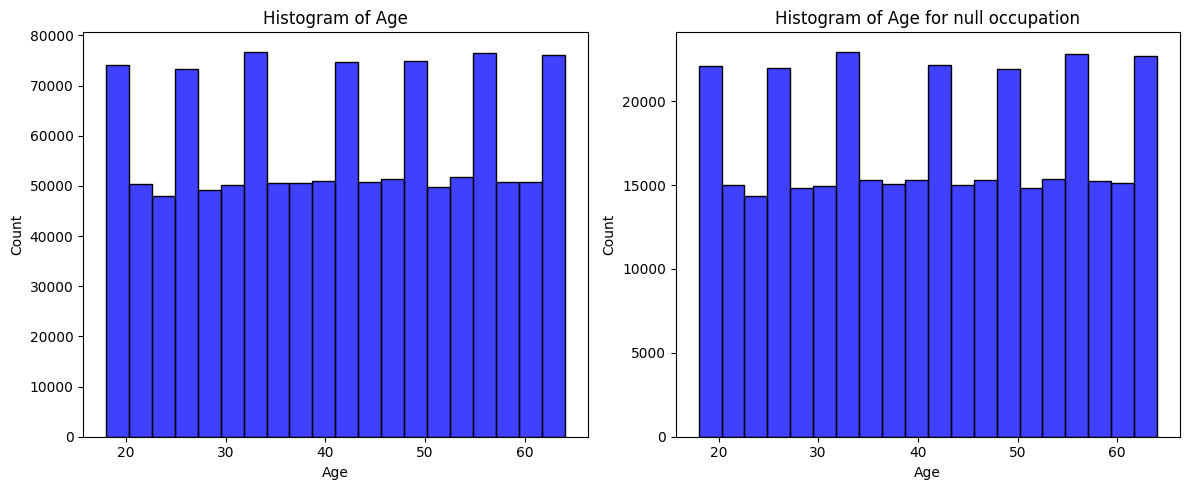

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First histogram for train_df['Age']
sns.histplot(train_df['Age'], kde=False, bins=20, color='blue', ax=axes[0])
axes[0].set_title("Histogram of Age")

# Second histogram for df_occu_null['Age']
sns.histplot(df_occu_null['Age'], kde=False, bins=20, color='blue', ax=axes[1])
axes[1].set_title("Histogram of Age for null occupation")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


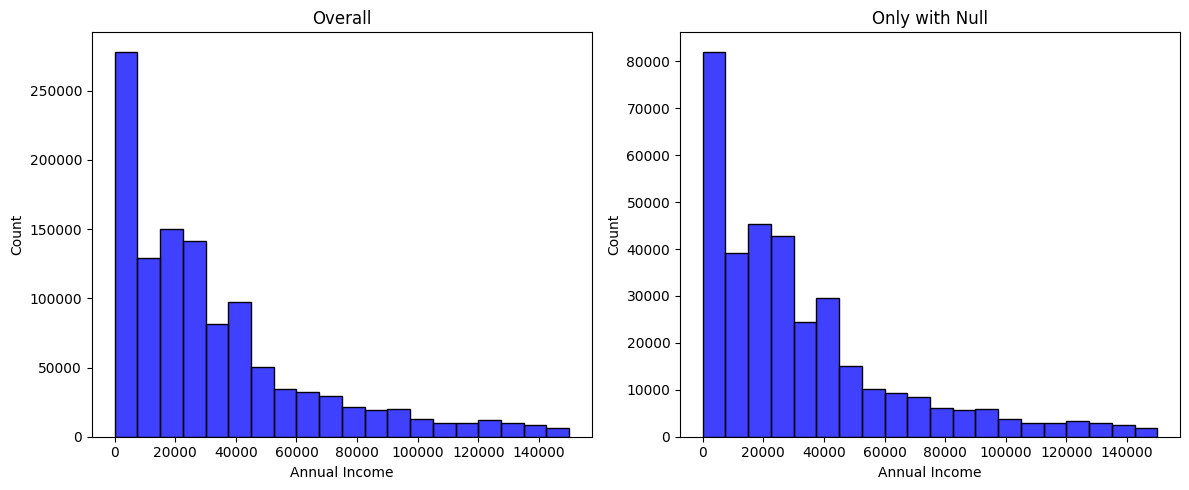

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First histogram for train_df['Age']
sns.histplot(train_df['Annual Income'], kde=False, bins=20, color='blue', ax=axes[0])
axes[0].set_title("Overall")


# Second histogram for df_occu_null['Age']
sns.histplot(df_occu_null['Annual Income'], kde=False, bins=20, color='blue', ax=axes[1])
axes[1].set_title("Only with Null")


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [31]:
np.max(train_df['Annual Income'])/np.max(df_occu_null['Annual Income'])

1.0000066668444492

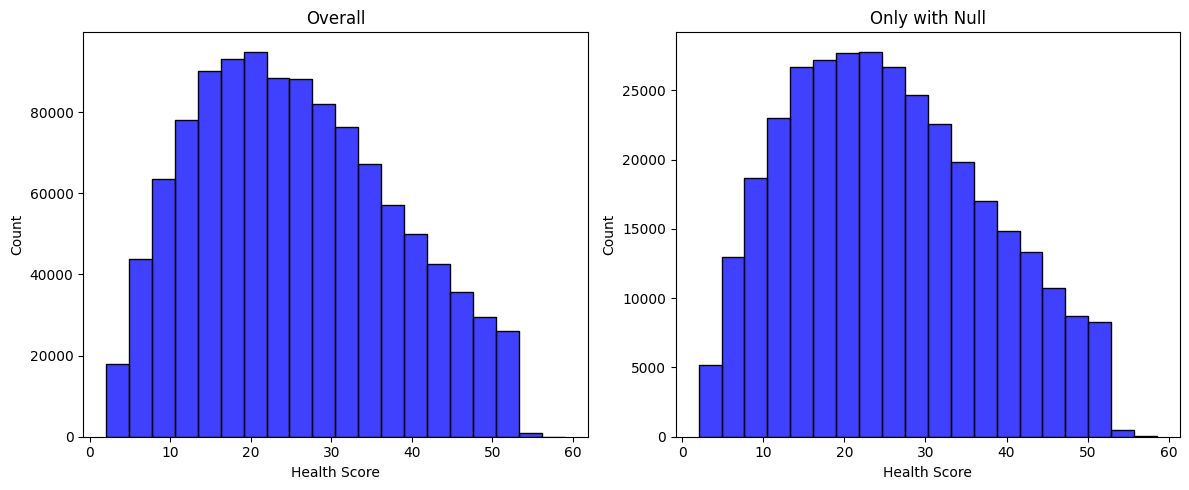

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First histogram for train_df['Age']
sns.histplot(train_df['Health Score'], kde=False, bins=20, color='blue', ax=axes[0])
axes[0].set_title("Overall")


# Second histogram for df_occu_null['Age']
sns.histplot(df_occu_null['Health Score'], kde=False, bins=20, color='blue', ax=axes[1])
axes[1].set_title("Only with Null")


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [34]:
np.max(train_df['Health Score'])/np.max(df_occu_null['Health Score'])

1.0069357521995759